## this notebook merges the concept of MAB and gym environments(to tackle knows issues of Lab midsem exams)

### implementing the Epsilon greedy on mountain car env (remains same for other env -> just the bands change based on action space)

In [2]:
### MAB implementation on Mountain Car
import gymnasium as gym
import numpy as np
import pandas as pd
env = gym.make('MountainCar-v0')
state,info = env.reset()

In [3]:
np.random.seed(42)#so proper we get
def epislon_greedy(Q_values,epislon):
    if np.random.rand()<epislon: #.rand() gives between 0 and 1 from the random distribution
        return np.random.choice(len(Q_values)) #so gives index of q values random choice
    else:
        return np.argmax(Q_values)#so to get the max value of Qvalues array

In [4]:
# Initialize Q-values and counts
Q_values = np.zeros(3)  # There are 3 possible actions: left, still, right
N_values = np.zeros(3)

steps = 0
done = False
truncated = False
total_reward = 0
epsilon = 0.2

while steps < 100 and not done and not truncated:
    action_index = epislon_greedy(Q_values, epsilon)
    state, reward, done, truncated, _ = env.step(action_index)
    
    # Update count of chosen action
    N_values[action_index] += 1
    
    # Update Q-value using incremental mean formula
    Q_values[action_index] += (reward - Q_values[action_index]) / N_values[action_index]
    
    steps += 1
    total_reward += reward

env.close()
print("Total Reward:", total_reward)
print("Final Q-values:", Q_values)

Total Reward: -100.0
Final Q-values: [-1. -1. -1.]


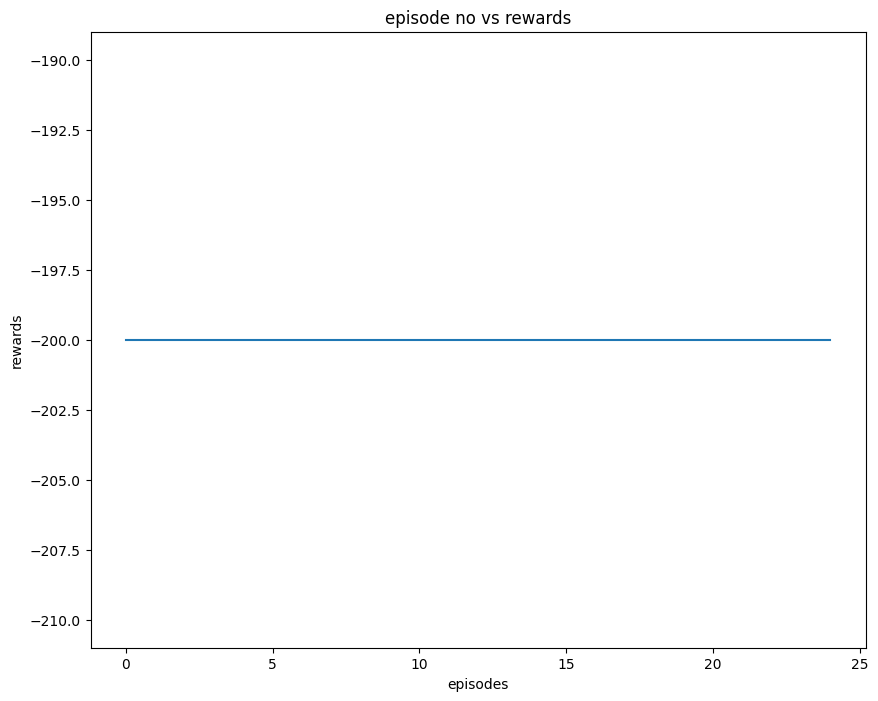

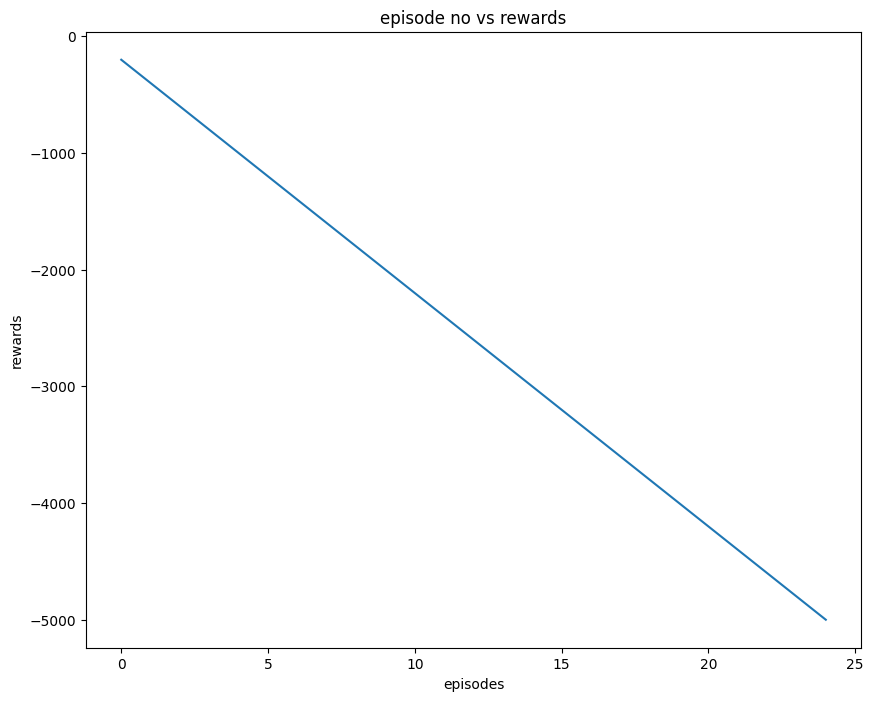

In [5]:
#implementing MAB for diff episodes on mountain car(like policy for the others)
episodes = 25
episodes_reward = []

for i in range(episodes):
    Q_values = np.zeros(3)
    N_values = np.zeros(3)
    done =False
    truncated = False
    total_reward = 0
    epislon = 0.2
    state,info = env.reset()

    while not done and not truncated:
        action_index = epislon_greedy(Q_values,epislon)
        state, reward, done, truncated, _ = env.step(action_index)

        # Update count of chosen action
        N_values[action_index] += 1

        # Update Q-value using incremental mean formula
        Q_values[action_index] += (reward - Q_values[action_index]) / N_values[action_index]

        total_reward += reward

    episodes_reward.append(total_reward)

env.close()

import matplotlib.pyplot as plt
import itertools
plt.figure(figsize=(10,8))
plt.plot(range(len(episodes_reward)),episodes_reward)
plt.xlabel("episodes")
plt.ylabel("rewards")
plt.title("episode no vs rewards")
plt.show()

episode_reward_cum = list(itertools.accumulate(episodes_reward))
plt.figure(figsize=(10,8))
plt.plot(range(len(episode_reward_cum)),episode_reward_cum)
plt.xlabel("episodes")
plt.ylabel("rewards")
plt.title("episode no vs rewards")
plt.show()

### UCB with mountain car implementation(remains same for other env -> just the bands change based on action space)

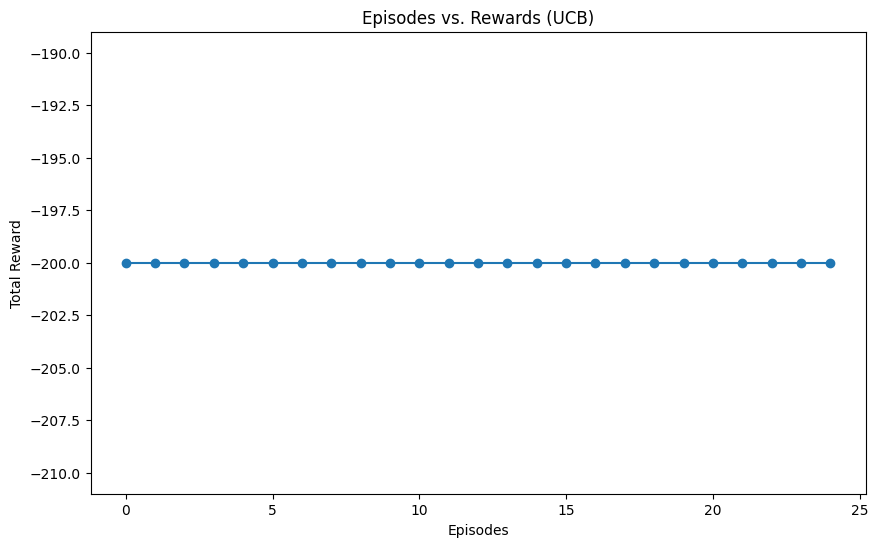

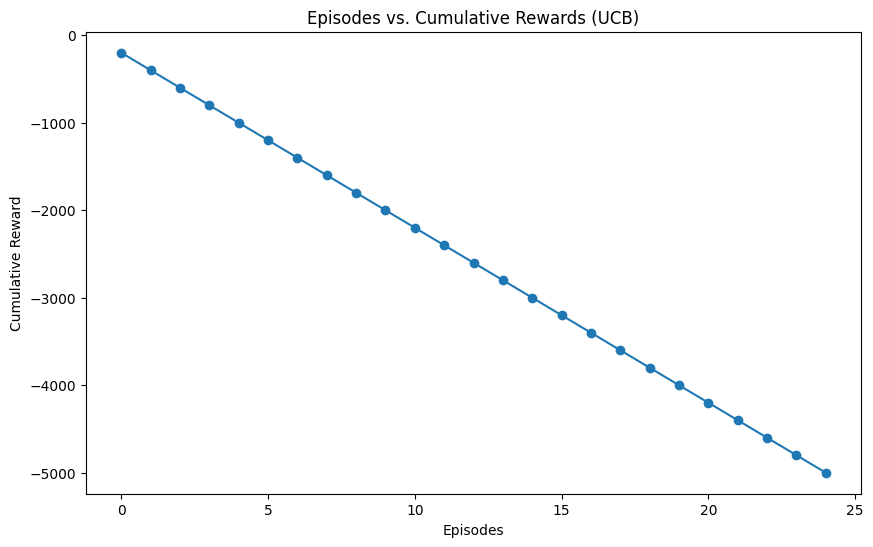

In [1]:
#implementing UCB with mountain car as policy using episodes
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import itertools

# Define UCB action selection function
def ucb_action_taker(Q_values, N_values, total_steps, c):
    ucb_values = []
    for i in range(len(Q_values)):
        if N_values[i] == 0:
            ucb_values.append(np.inf)  # Assign infinite value for unexplored actions
        else:
            ucb_values.append(Q_values[i] + c * np.sqrt(2 * np.log(total_steps + 1) / N_values[i]))#and formula is this
    return np.argmax(ucb_values)

# Initialize environment
env = gym.make('MountainCar-v0')

episodes = 25
episodes_reward = []

for i in range(episodes):
    Q_values = np.zeros(3)
    N_values = np.zeros(3)
    done = False
    truncated = False
    total_reward = 0
    c = 2.0

    state_info = env.reset()
    state = state_info if isinstance(state_info, np.ndarray) else state_info[0]

    total_steps = 0  # Track total steps taken
    max_steps = 200  # Set a reasonable limit

    while not done and not truncated and total_steps < max_steps:
        action_index = ucb_action_taker(Q_values, N_values, total_steps, c)#total_steps is continuous steps
        state, reward, done, truncated, _ = env.step(action_index)

        # Update count of chosen action
        N_values[action_index] += 1

        # Update Q-value using incremental mean formula
        Q_values[action_index] += (reward - Q_values[action_index]) / N_values[action_index]

        total_reward += reward
        total_steps += 1  # Update step count

    episodes_reward.append(total_reward)

env.close()

# Plot episode rewards
plt.figure(figsize=(10, 6))
plt.plot(range(len(episodes_reward)), episodes_reward, marker='o', linestyle='-')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Episodes vs. Rewards (UCB)")
plt.show()

# Compute and plot cumulative rewards
episode_reward_cum = list(itertools.accumulate(episodes_reward))
plt.figure(figsize=(10, 6))
plt.plot(range(len(episode_reward_cum)), episode_reward_cum, marker='o', linestyle='-')
plt.xlabel("Episodes")
plt.ylabel("Cumulative Reward")
plt.title("Episodes vs. Cumulative Rewards (UCB)")
plt.show()
